# EDA BUSINESS ANALYTICS PROJECT (RETAIL)


OMOWUMI BADMUS

1. Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
2. As a business manager, try to find out the weak areas where you can work to make more profit.

3.  What all business problems you can derive by exploring the data?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the Dataset

In [2]:
sample = pd.read_csv('SampleSuperstore.csv')
sample

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
sample.shape

(9994, 13)

In [4]:
sample.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
sample.duplicated().sum()

17

In [7]:
sample = sample.drop_duplicates(subset=None,keep= 'first')
sample

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Exploring some of the Dataset Column

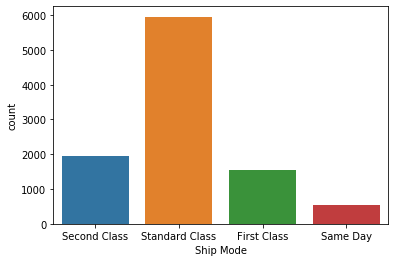

In [8]:
sns.countplot(sample['Ship Mode'])

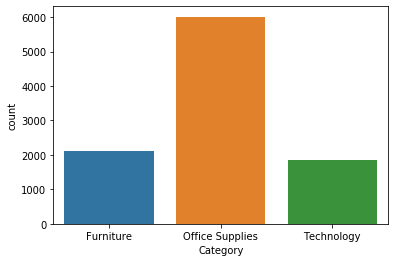

In [9]:
sns.countplot(sample['Category'])

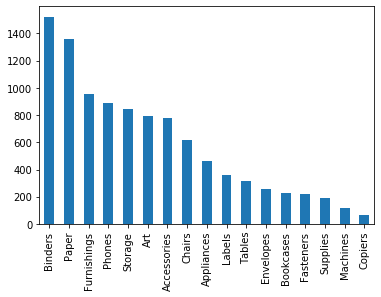

In [10]:
sample['Sub-Category'].value_counts().plot(kind='bar', rot=90)

# Analysing the Dataset to understand the trends of sub-category Sales, Quantity , Discount on profit

In [11]:
subprofit = sample.pivot_table(values='Profit', index='Sub-Category', aggfunc='mean', margins=True)
subprofit

,Profit
Sub-Category,
Accessories,54.111788
Appliances,38.922758
Art,8.207059
Binders,19.860710
Bookcases,-15.230509
Chairs,43.198582
Copiers,817.909190
Envelopes,27.418019
Fasteners,4.375660


In [12]:
subquantity = sample.pivot_table(values=['Profit','Quantity'], index='Sub-Category', aggfunc='sum', margins=True)
subquantity = subquantity.drop('All')
subquantity

,Profit,Quantity
Sub-Category,,
Accessories,41936.6357,2976
Appliances,18138.0054,1729
Art,6524.6118,2996
Binders,30228.0003,5971
Bookcases,-3472.5560,868
Chairs,26567.1278,2351
Copiers,55617.8249,234
Envelopes,6964.1767,906
Fasteners,949.5182,914


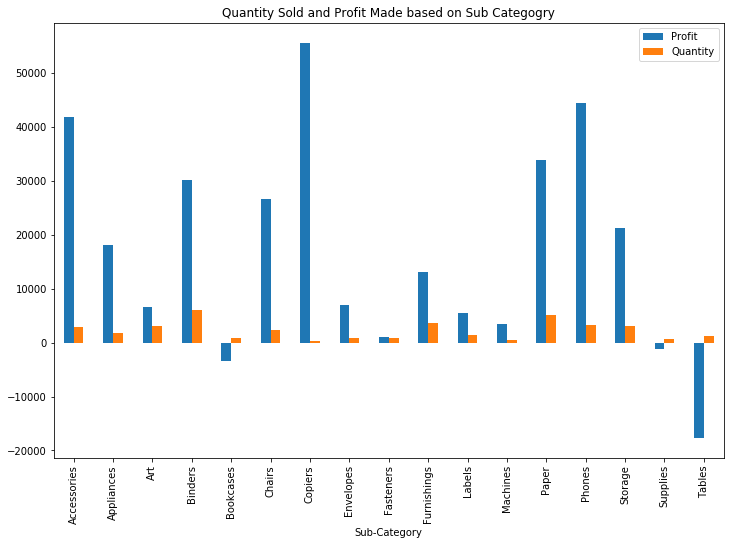

In [13]:
subquantity.plot(kind='bar', title='Quantity Sold and Profit Made based on Sub Categogry', legend=True, figsize=(12,8))

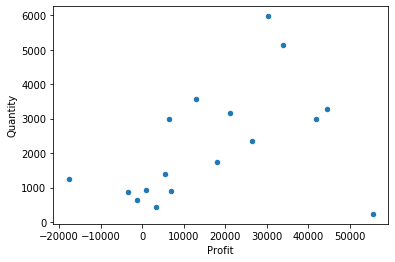

In [14]:
subquantity.plot.scatter('Profit', 'Quantity')

In [15]:
sample['Sales'].value_counts(normalize=True) * 100

12.960     0.551268
19.440     0.370853
15.552     0.370853
10.368     0.350807
25.920     0.340784
             ...   
14.720     0.010023
376.866    0.010023
572.800    0.010023
3.928      0.010023
629.640    0.010023
Name: Sales, Length: 5825, dtype: float64

In [16]:
subquantity.describe()

,Profit,Quantity
count,17.000000,17.000000
mean,16837.730741,2224.705882
std,19684.317583,1664.970674
min,-17725.481100,234.000000
25%,3384.756900,906.000000
50%,13052.723000,1729.000000
75%,30228.000300,3158.000000
max,55617.824900,5971.000000


In [17]:
sample['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [18]:
salesprofit = sample.pivot_table(values=['Profit','Sales'], index='Sub-Category', aggfunc='sum', margins=True)
salesprofit = salesprofit.drop('All')
salesprofit

,Profit,Sales
Sub-Category,,
Accessories,41936.6357,167380.3180
Appliances,18138.0054,107532.1610
Art,6524.6118,27107.0320
Binders,30228.0003,203409.1690
Bookcases,-3472.5560,114879.9963
Chairs,26567.1278,327777.7610
Copiers,55617.8249,149528.0300
Envelopes,6964.1767,16476.4020
Fasteners,949.5182,3024.2800


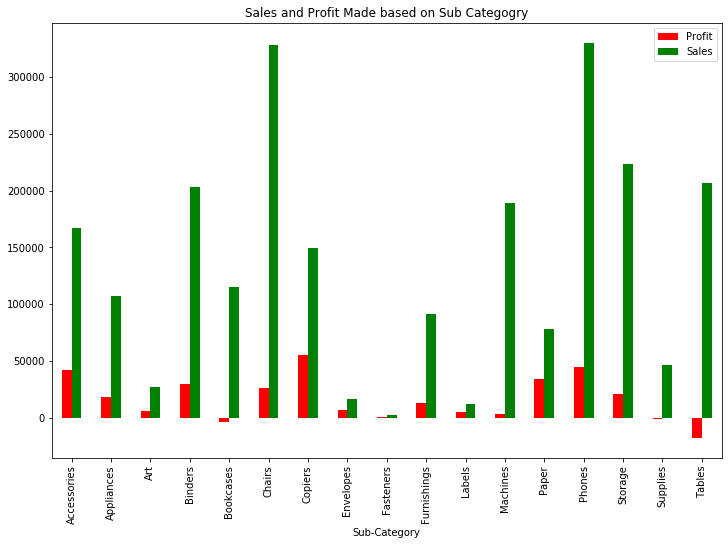

In [19]:
colours = 'red', 'green'
salesprofit.plot(kind='bar', title='Sales and Profit Made based on Sub Categogry', legend=True, figsize=(12,8), color=colours)

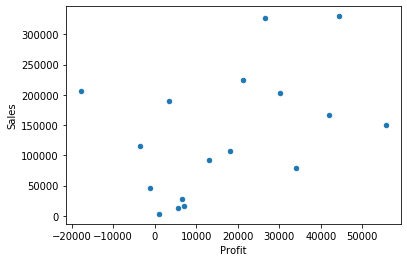

In [20]:
salesprofit.plot.scatter('Profit', 'Sales')

In [21]:
profitregion = sample.pivot_table(values=['Profit','Sales'], index='Region', aggfunc='sum', margins=True)
profitregion = profitregion.drop('All')
profitregion

,Profit,Sales
Region,,
Central,39655.8752,500782.8528
East,91506.3092,678435.1960
South,46749.4303,391721.9050
West,108329.8079,725255.6365


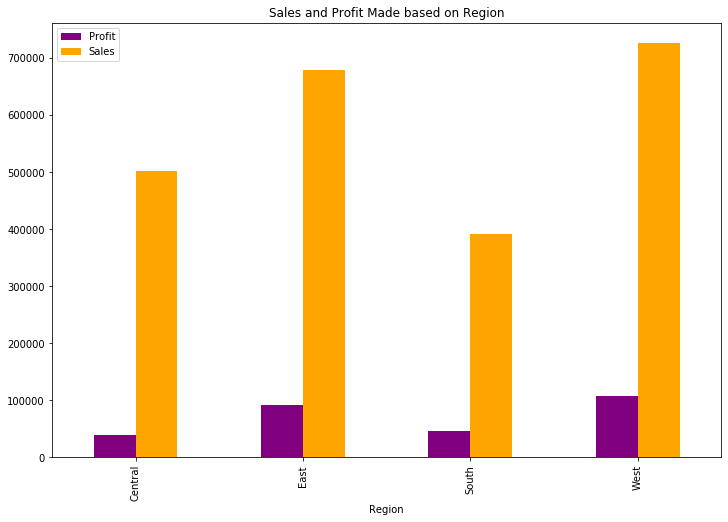

In [22]:
colours = 'purple', 'orange'
profitregion.plot(kind='bar', title='Sales and Profit Made based on Region', legend=True, figsize=(12,8), color=colours)

In [23]:
discount = sample.pivot_table(values=['Profit','Sales', 'Discount'], index='Sub-Category', aggfunc='sum', margins=True)
discount = discount.drop('All')
discount

,Discount,Profit,Sales
Sub-Category,,,
Accessories,60.80,41936.6357,167380.3180
Appliances,77.60,18138.0054,107532.1610
Art,59.60,6524.6118,27107.0320
Binders,566.20,30228.0003,203409.1690
Bookcases,48.14,-3472.5560,114879.9963
Chairs,104.70,26567.1278,327777.7610
Copiers,11.00,55617.8249,149528.0300
Envelopes,20.40,6964.1767,16476.4020
Fasteners,17.80,949.5182,3024.2800


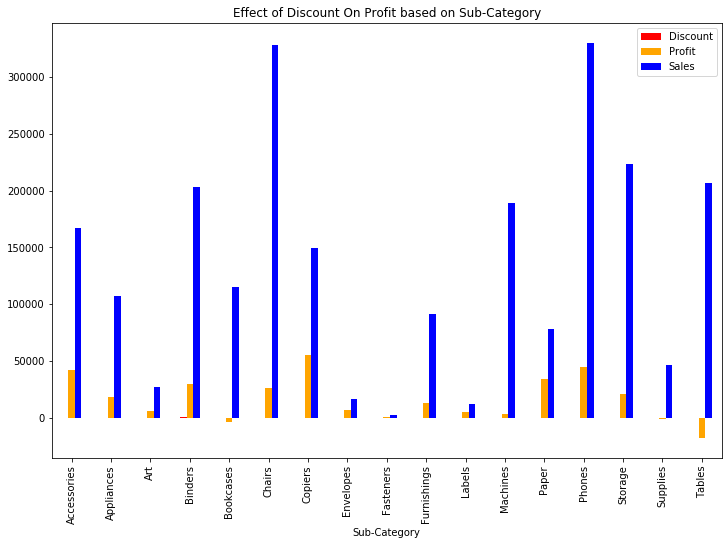

In [24]:
colours = 'red', 'orange', 'blue' 
discount.plot(kind='bar', title='Effect of Discount On Profit based on Sub-Category', legend=True, figsize=(12,8), color=colours)

# Conclusion

From the analysis above it is observed that the Superstore made a lot of sales in office supplies and furniture than technolgy.
In the Sub-Category Chairs and Phones have the highest sales but the profit made from this two is very low compared to what is expected from such kind of sales

If we also compare the quantity of items sold and profit made based on Sub-Categories, the superstore experience some losses expecially in Bookcases, supplies and Tables.
Most of the items sold most in the east and west Region than the other region

Looking at the effect of Discount on sales and Profit based on Sub-Category, it is also observed that the Discount does not really make much Differnce in the sales and Profit made.

It is true that there is correlation between all of this column but it is a weak correlation based on the scatter plot displayed  this implies that the company needs to look closely what is happening within the Superstore and also around to see what they can do to ensure that the more they sell the more profit they make.


The marketing department also need to target those region where they made more sales  and see how to improve.


